# Seaborn Visualizations

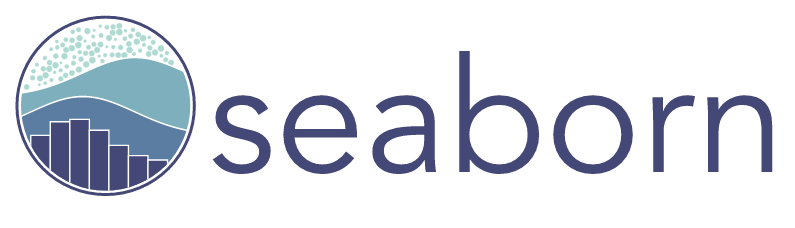

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Seaborn Versus Matplotlib

Here is an example of a simple random number plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some fictitious random data:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

Now let's say what a basic matplotlib plot looks like:

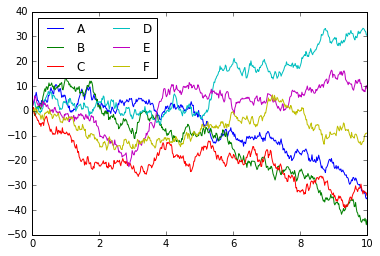

In [3]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [4]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

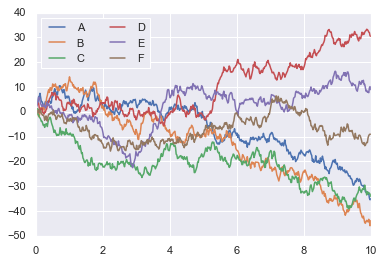

In [5]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Much better!

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

Let's use a real dataset that's built into Seaborn to examine the data. The dataset specifies numerous attributes of about 54,000 diamonds, and contains the following attributes:

- Price: Price in US dollars

- Carat: Carat weight of the diamond

- Cut: Quality of the diamond (Fair, Good, Very Good, Premium, Ideal)

- Color: Color of diamond, from J (worst) to D (best)

- Clarity: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x: Length in mm

- y: Width in mm

- z: Depth in mm

- Depth: Total depth percentage = z / mean(x, y) = 2 * z / (x + y)

- Table: Width of top of diamond relative to widest point

In [6]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Next we will do some dataset filtering to include only every twentieth point. In practice, we shouldn't just throw away part of the dataset if we can avoid it. Here we are doing it to make some of the upcoming graphs easier to work with and interpret.

In [7]:
diamonds = diamonds[::20]

Let's look for some relationships between the variables. Remember that correlations can only be done between numerical values. We could convert the categorical values to numbers, but have not done it here. For example, a cut of 'Premium' could be 0 and 'Ideal' could be 1.

In [8]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.026780,0.152871,0.918777,0.969293,0.968242,0.968085
depth,0.026780,1.000000,-0.230822,-0.011267,-0.026112,-0.029955,0.098414
table,0.152871,-0.230822,1.000000,0.105605,0.167889,0.161866,0.135288
price,0.918777,-0.011267,0.105605,1.000000,0.875639,0.877139,0.870770
x,0.969293,-0.026112,0.167889,0.875639,1.000000,0.998945,0.991700
y,0.968242,-0.029955,0.161866,0.877139,0.998945,1.000000,0.991156
z,0.968085,0.098414,0.135288,0.870770,0.991700,0.991156,1.000000


We see that the strongest relationships are between carat and the x,y,z columns. This makes sense because the weight of the diamond (number of carats) would of course depend on its size.

We can colorize the correlation matrix using a heatmap. There are different color mappings available.

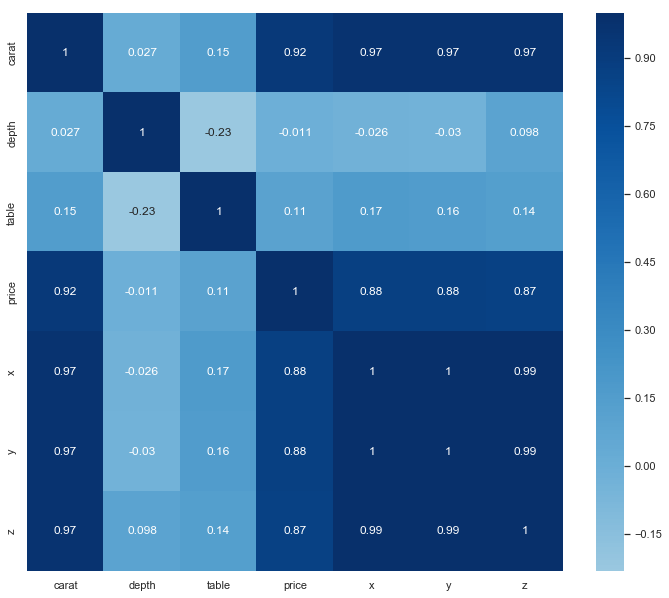

In [9]:
from matplotlib import cm
plt.figure(figsize=(12,10))
sns.heatmap(diamonds.corr(), cmap=cm.Blues, annot=True, center=0)
#sns.heatmap(diamonds.corr(), cmap=cm.PiYG, annot=True, center=0)
#sns.heatmap(diamonds.corr(), annot=True, center=0)

### We can make scatter plots with the relplot command.

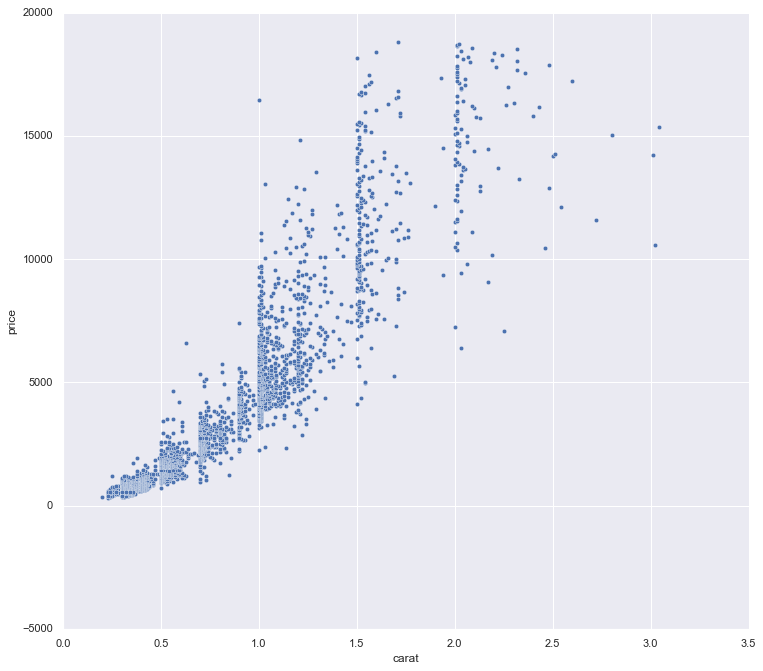

In [10]:
g = sns.relplot(data=diamonds, x='carat', y='price')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Same plot as above, but color the points based on the diamond cut.

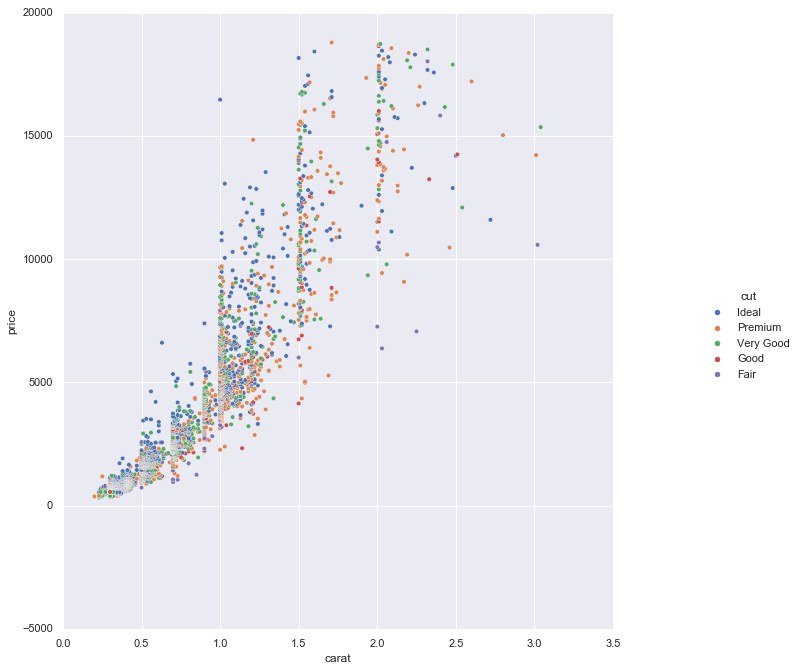

In [11]:
g = sns.relplot(data=diamonds, x='carat', y='price', hue='cut')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Same plot as above, but now color the points based on the diamond cut and plot a different shape for each clarity.

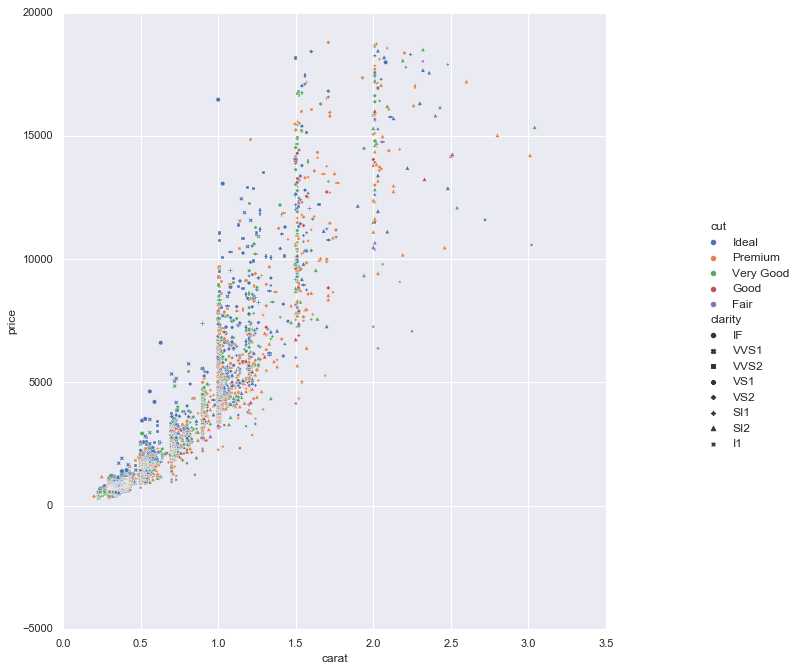

In [12]:
g = sns.relplot(data=diamonds, x='carat', y='price', hue='cut', style='clarity')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Same plot as above, but now create a separate plot for each diamond color.

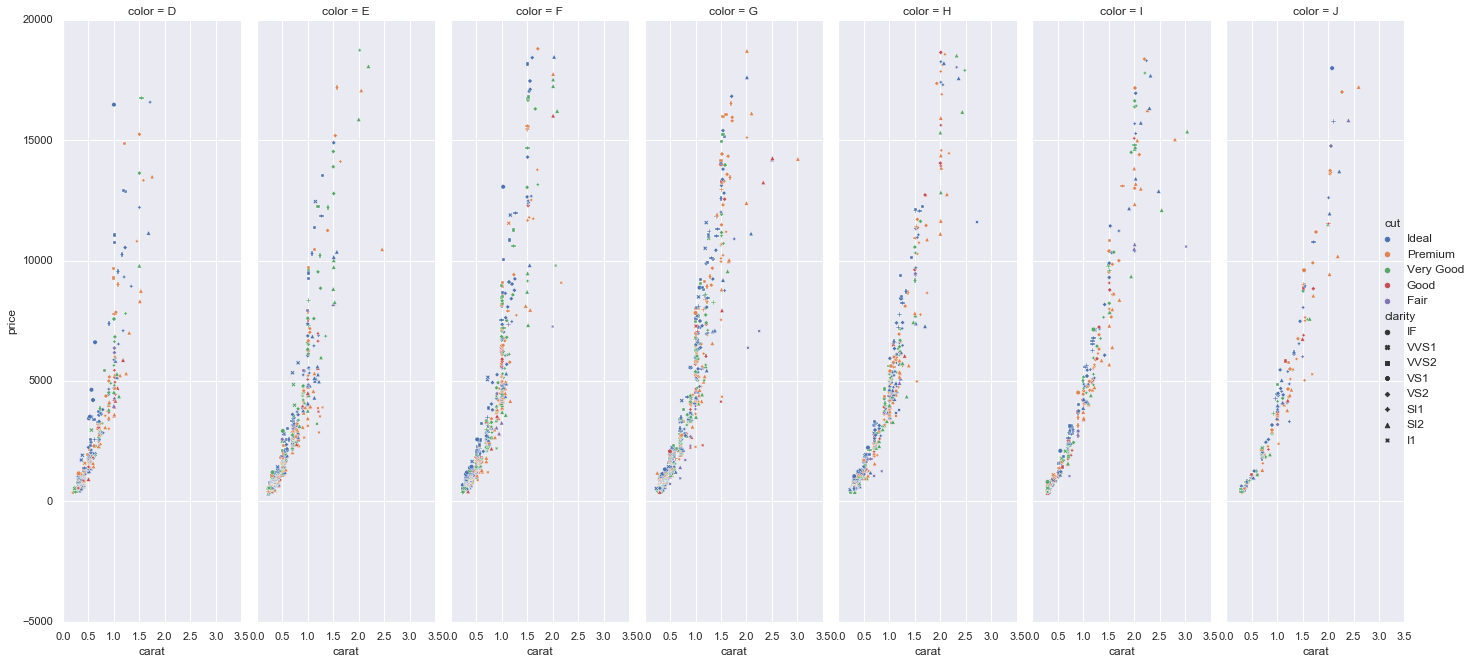

In [13]:
g = sns.relplot(data=diamonds, x='carat', y='price', hue='cut', style='clarity', col = 'color')
g.fig.set_figwidth(20)
g.fig.set_figheight(10)

Scatter plot with trend line.

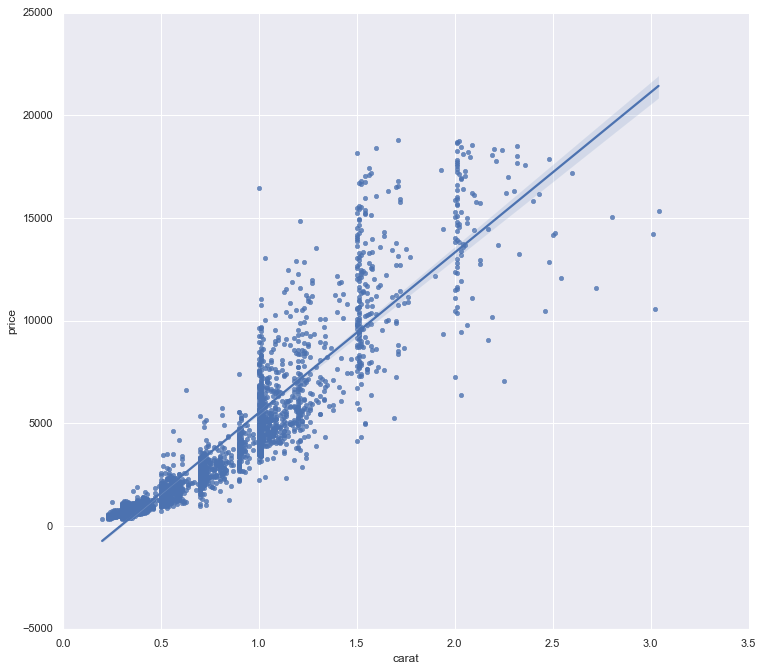

In [14]:
g = sns.lmplot(x='carat', y='price', data=diamonds)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Same as above, but make a separate plot for each clarity.

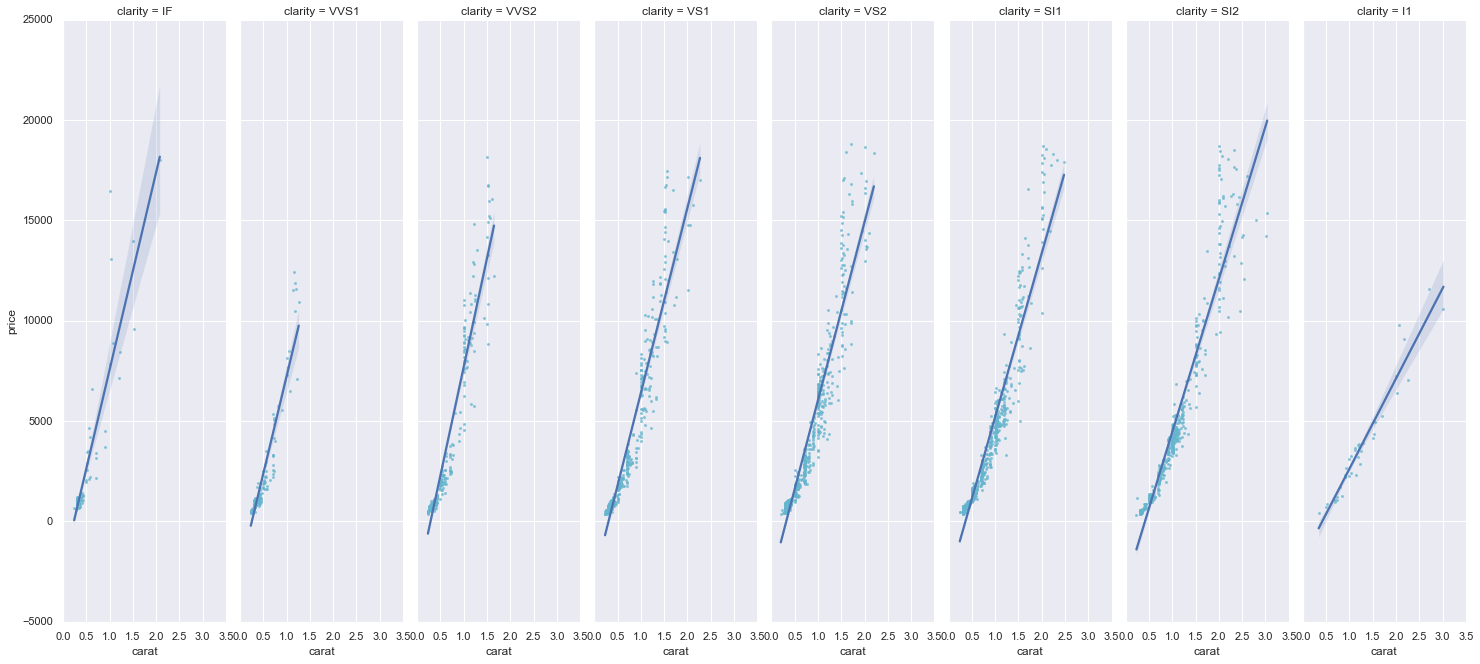

In [15]:
g = sns.lmplot(data=diamonds, x='carat', y='price', col='clarity', 
               markers=".", scatter_kws=dict(color='c'))
g.fig.set_figwidth(20)
g.fig.set_figheight(10)

### Bar plots

Bar plots allow us to see the mean and spread of the values in a column. Below, we look at the average price of the diamond based on the cut.

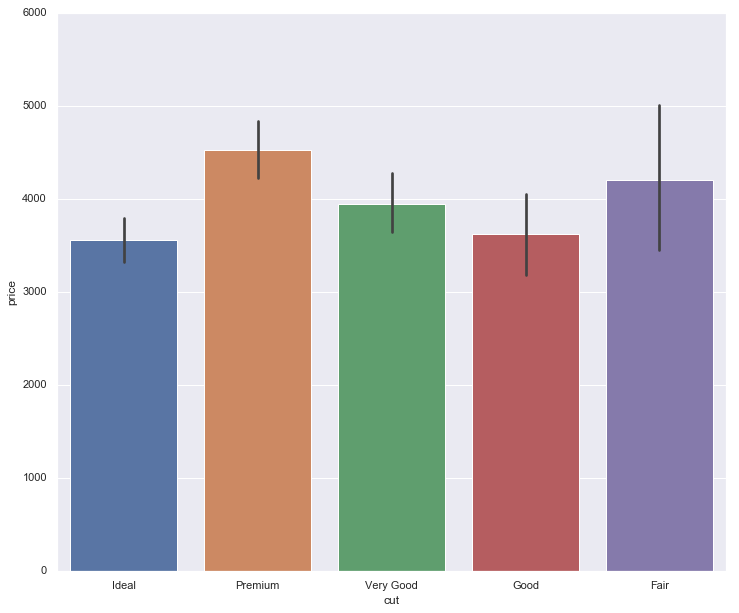

In [16]:
g = sns.barplot(x='cut', y='price', data=diamonds)
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

Now flip it sideways but specifying the y parameter first.

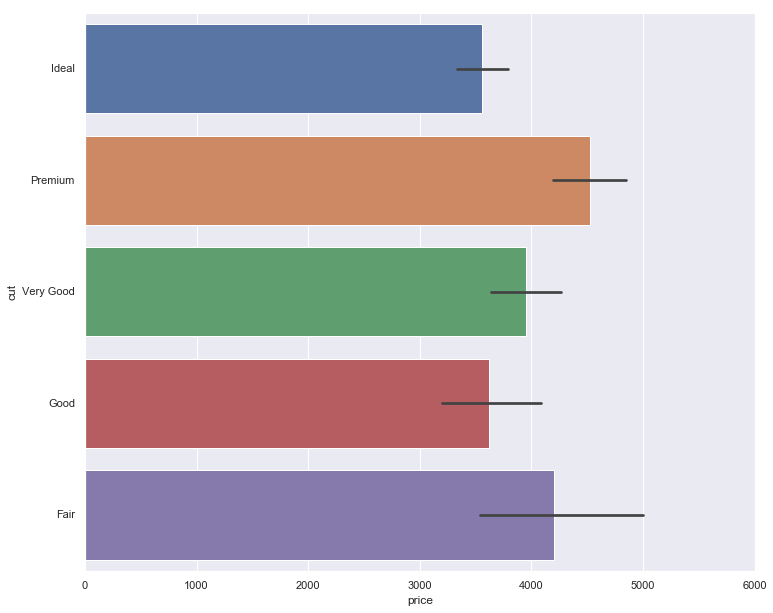

In [17]:
g = sns.barplot(y='cut', x='price', data=diamonds)
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

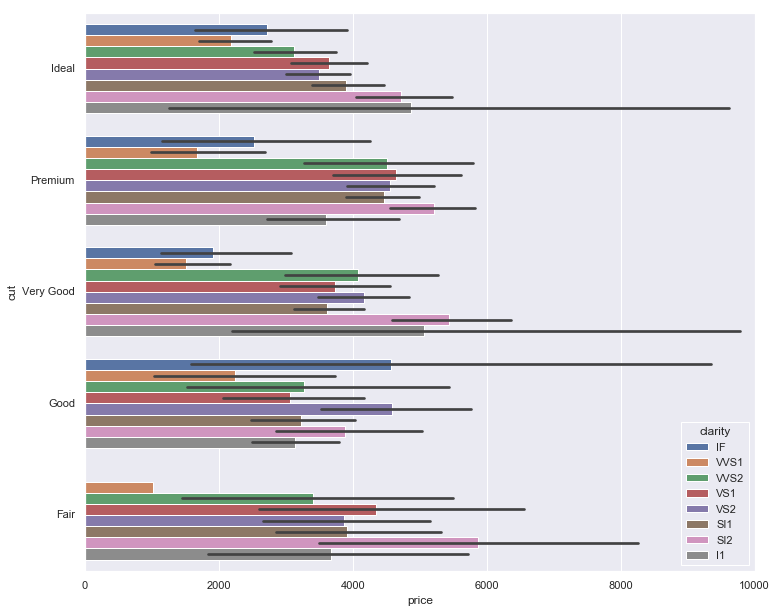

In [18]:
g = sns.barplot(y='cut', x='price', hue='clarity', data=diamonds)
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. Here we also see how to set a title and axis labels.

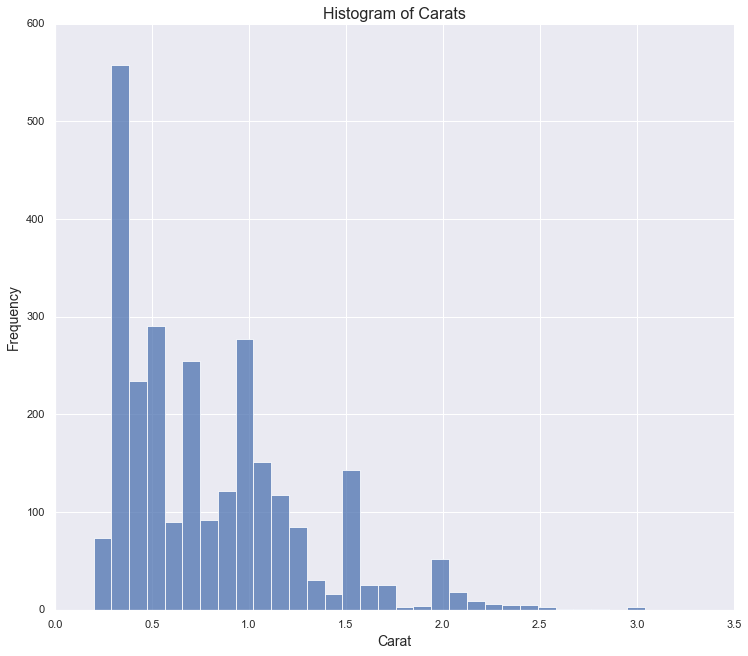

In [19]:
g = sns.displot(diamonds['carat'], kde=False)
plt.title('Histogram of Carats', fontsize=16)
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

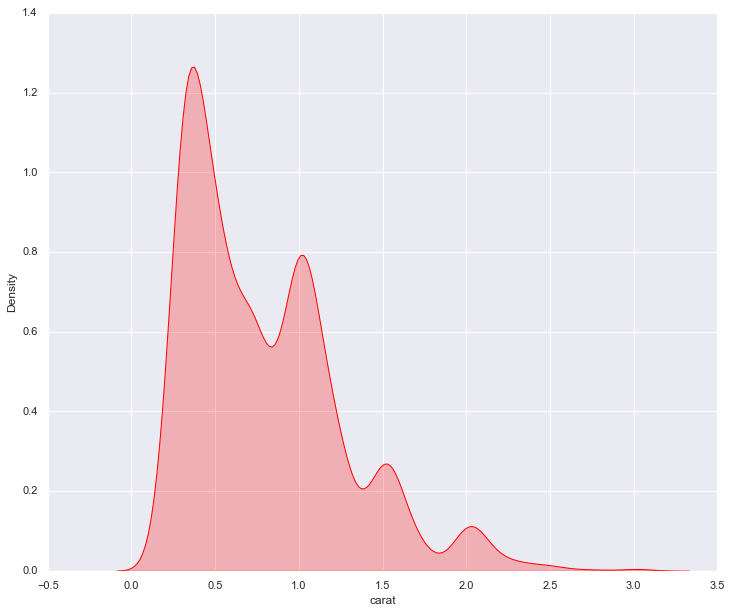

In [20]:
plt.figure(figsize=(12,10))
sns.kdeplot(diamonds['carat'], shade=True, color='red')

Histograms and KDE can be combined using ``distplot`` if we omit the kde=False part:

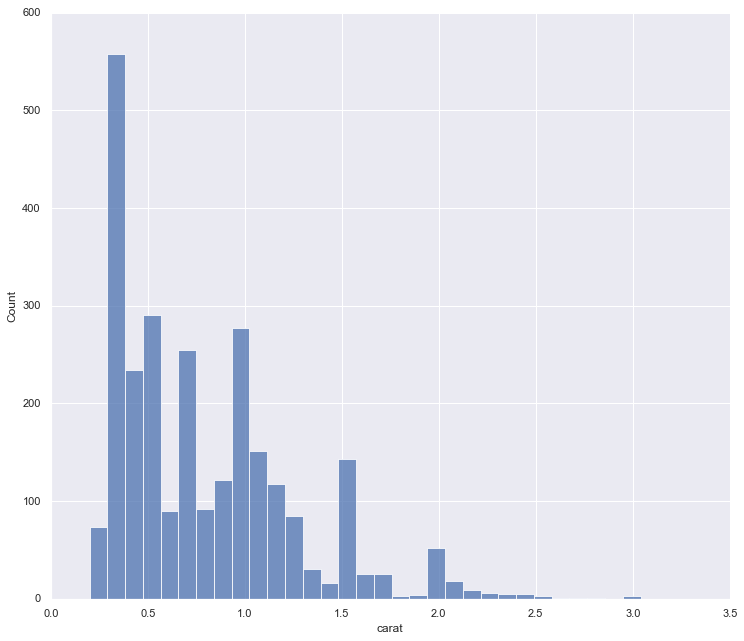

In [21]:
g = sns.displot(diamonds['carat'])
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

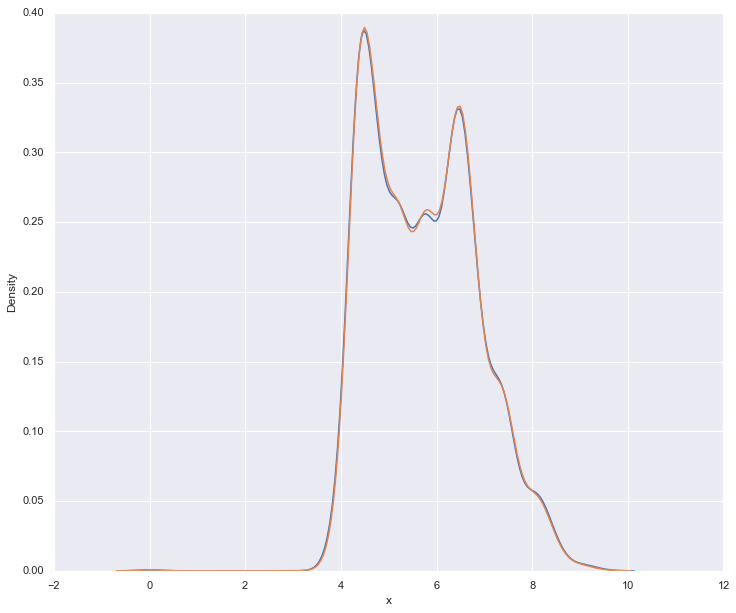

In [22]:
plt.figure(figsize=(12,10))
sns.kdeplot(diamonds['x'])
sns.kdeplot(diamonds['y'])

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

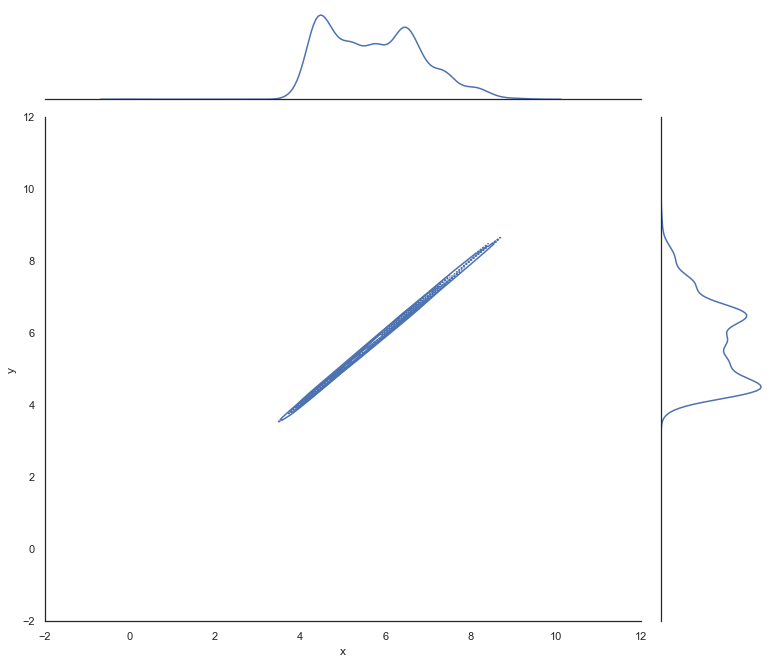

In [23]:
with sns.axes_style('white'):
    g = sns.jointplot(data=diamonds, x='x', y='y', kind='kde')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

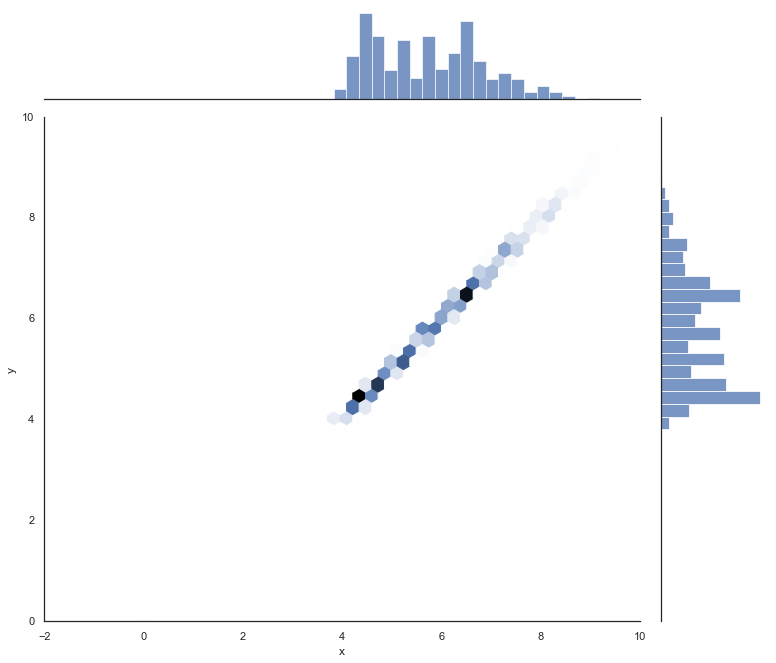

In [24]:
with sns.axes_style('white'):
    g = sns.jointplot(data=diamonds, x='x', y='y', kind='hex')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

We can create a best fit line for the data. The data here is randomly generated, so the regression line isn't a good one, but the concept is useful.

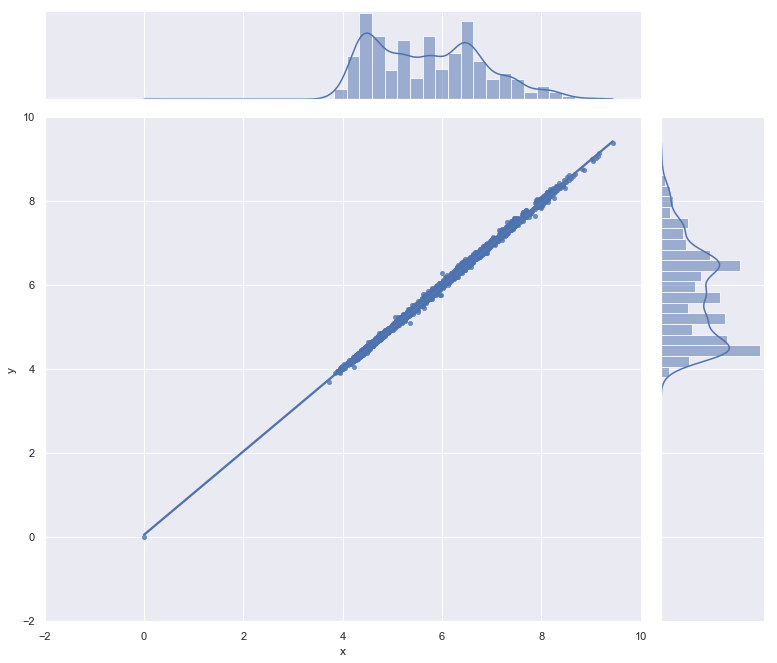

In [25]:
g = sns.jointplot(data=diamonds, x='x', y='y', kind='reg')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

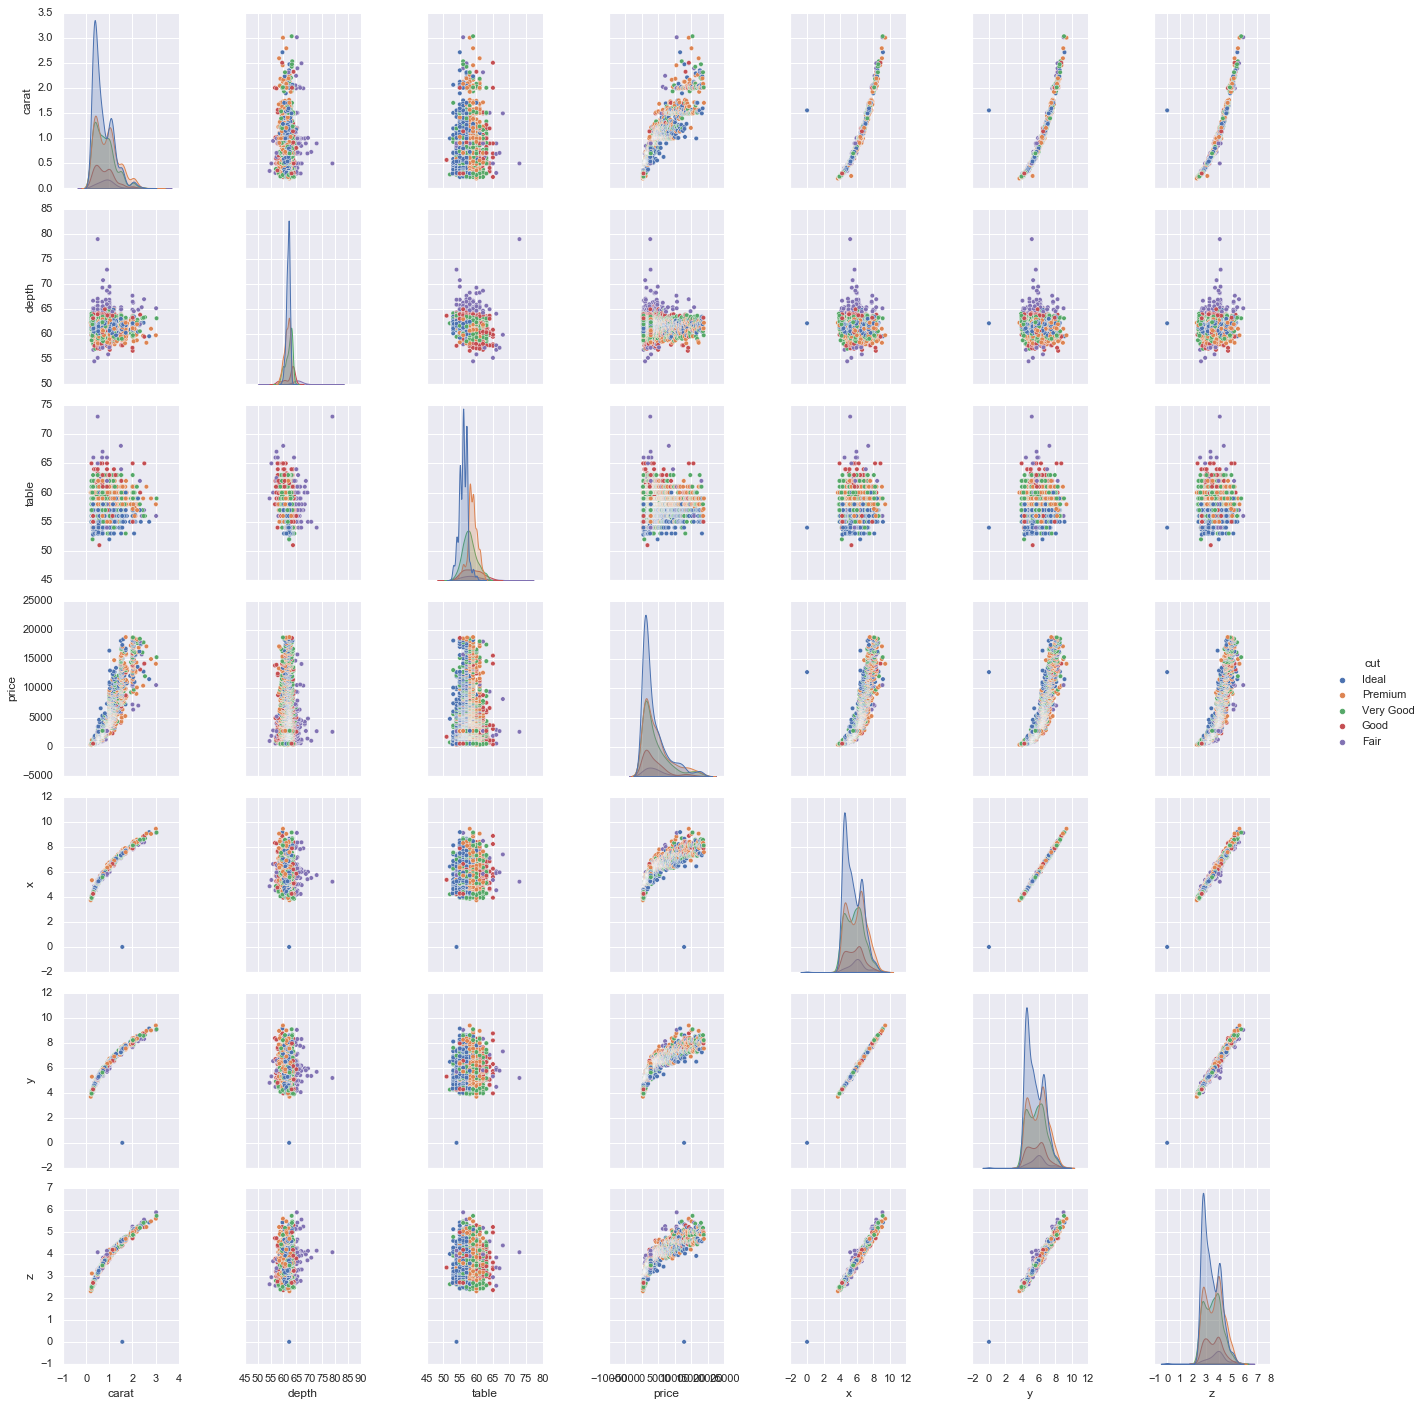

In [26]:
g = sns.pairplot(diamonds, hue='cut', height=2.5)
g.fig.set_figwidth(20)
g.fig.set_figheight(20)

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.

In [27]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
20,0.30,Good,I,SI2,63.3,56.0,351,4.26,4.30,2.71
40,0.33,Ideal,I,SI2,61.2,56.0,403,4.49,4.50,2.75
60,0.35,Ideal,I,VS1,60.9,57.0,552,4.54,4.59,2.78
80,0.26,Very Good,E,VVS1,63.4,59.0,554,4.00,4.04,2.55


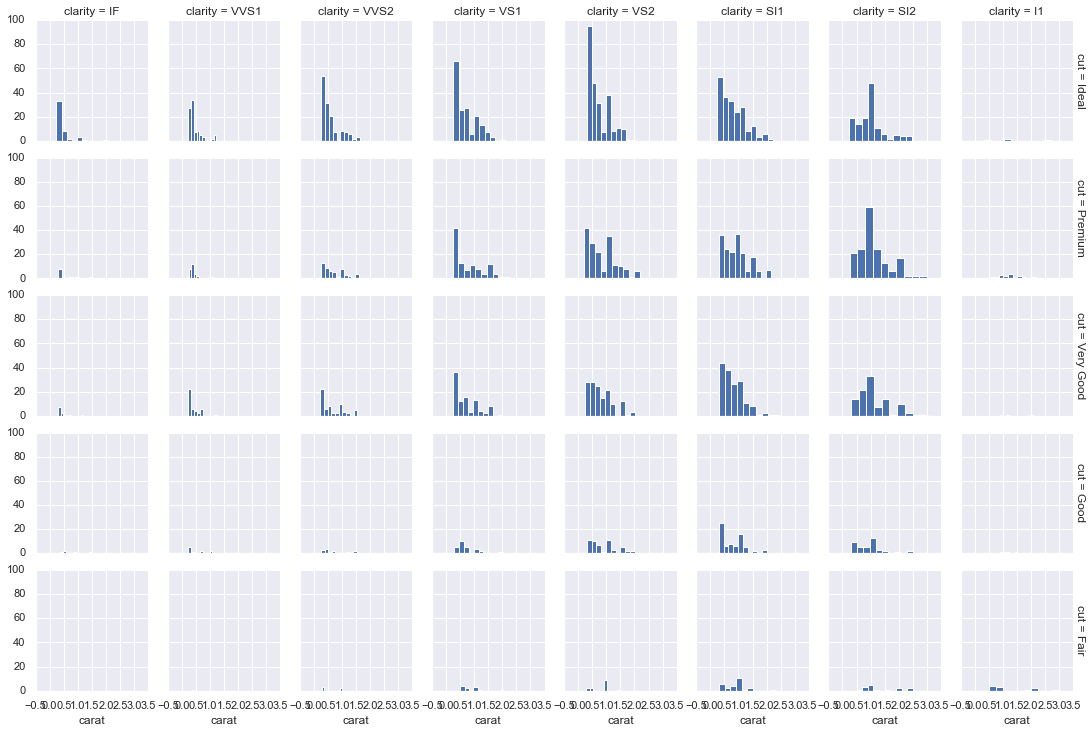

In [28]:
g = sns.FacetGrid(diamonds, row='cut', col='clarity', margin_titles=True)
g.map(plt.hist, 'carat')
g.fig.set_figwidth(15)
g.fig.set_figheight(10)

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

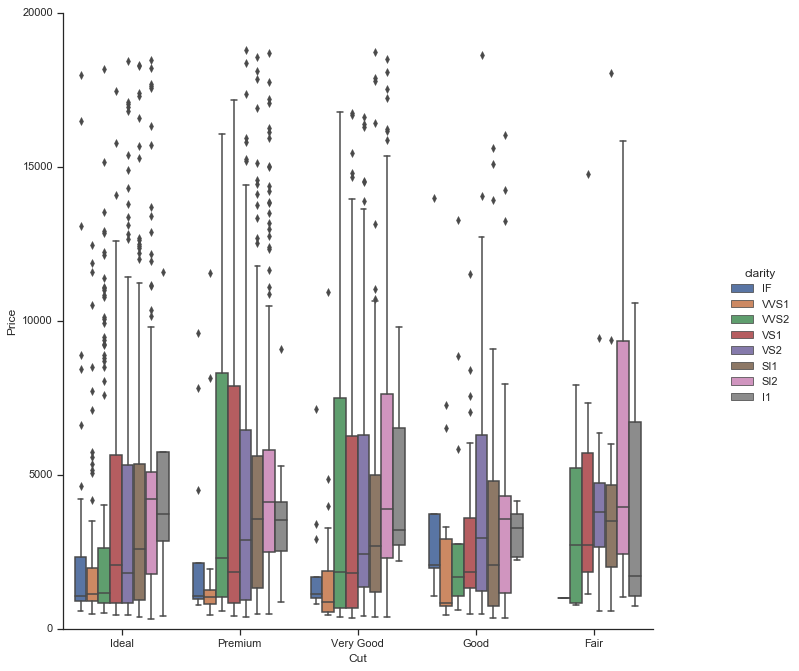

In [54]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=diamonds, x='cut', y='price', hue='clarity', kind="box")
    g.set_axis_labels('Cut', 'Price')
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

### Violin plots

Violin plots help us see the distribution of values across a variable. The area where the graph is wider is where more data points fall. In the plot below, we see that most Ideal cut diamonds cost around 1000 dollars. Some of the distribution goes below 0 dollars due to the smoothing effect of the plot. We can see the actual points inside of the "violin".

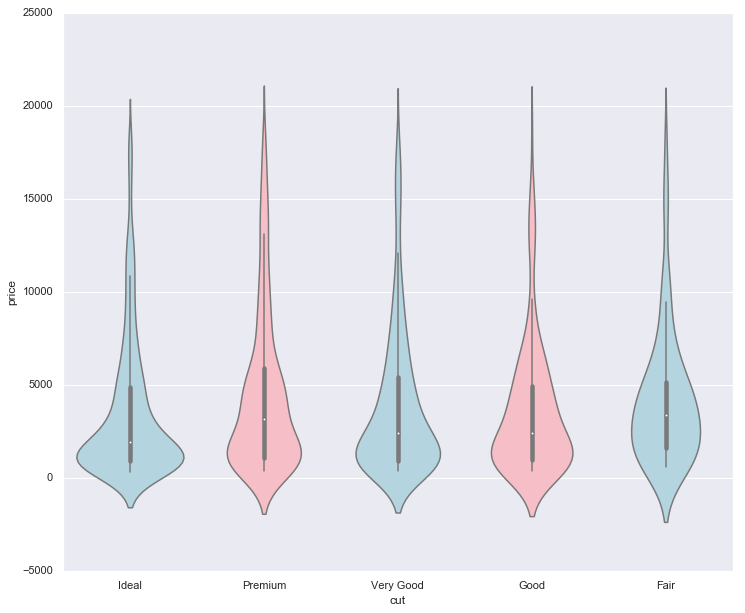

In [30]:
g = sns.violinplot(data=diamonds, x='cut', y='price',
               palette=["lightblue", "lightpink"])
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

To save a plot to file, first we have to name the Seaborn plot and then use the savefig function.

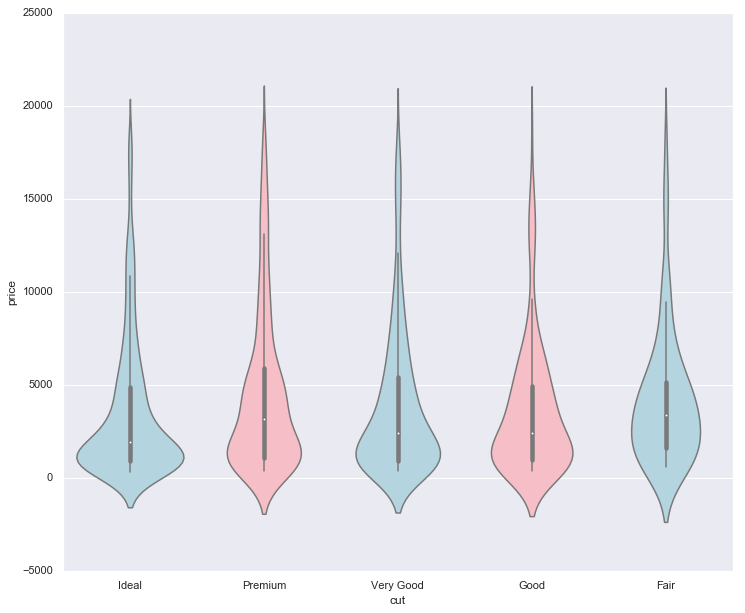

In [31]:
g = sns.violinplot(data=diamonds, x='cut', y='price',
               palette=["lightblue", "lightpink"])
g.figure.set_figwidth(12)
g.figure.set_figheight(10)
g.figure.savefig('output.png', format='jpeg', dpi=70)

A swarm plot shows all of the underlying data side by side. The difference in x-values within a category has no meaning here. It is just meant to show where the density lies.

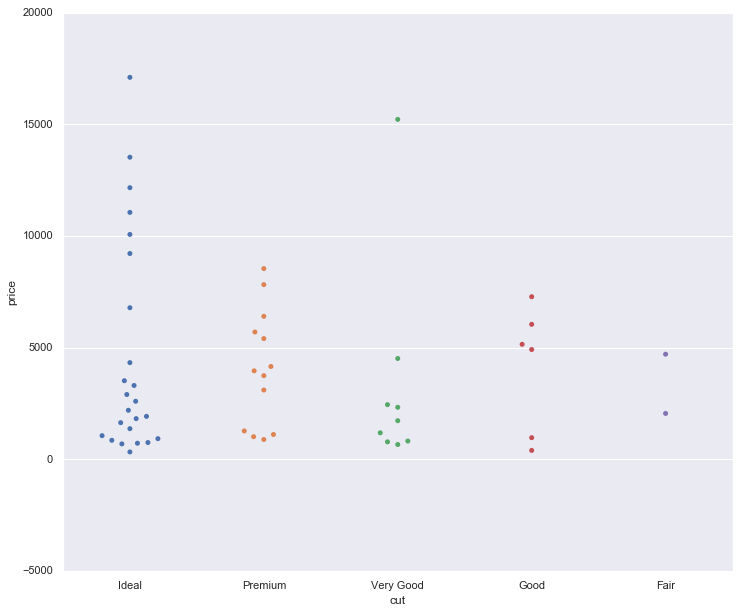

In [32]:
g = sns.swarmplot(data=diamonds[::50], x='cut', y='price') # Take every 50th point to make graph easier to read
g.figure.set_figwidth(12)
g.figure.set_figheight(10)

We can also combine violin and swarm plots.

Text(0.5, 1.0, 'Diamond Price vs. Cut')

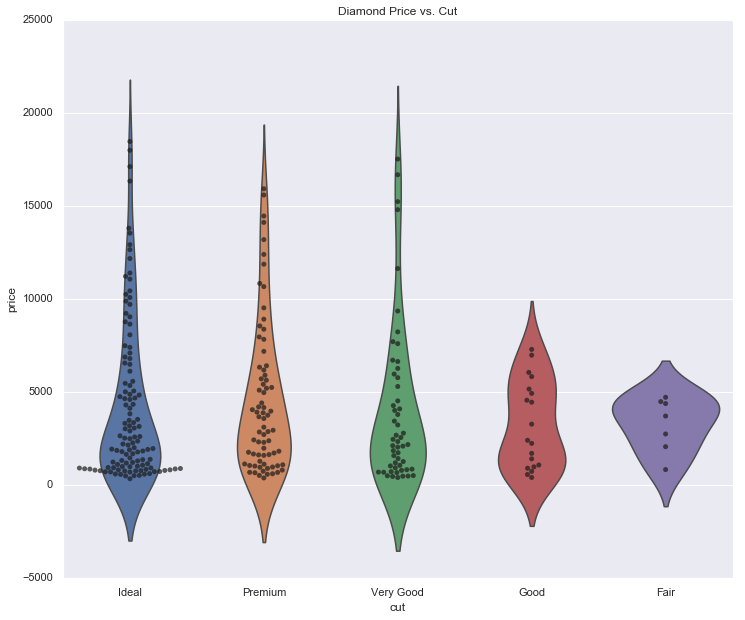

In [33]:
# Set figure size with matplotlib
plt.figure(figsize=(12,10))
 
# Create plot
sns.violinplot(x='cut',
               y='price', 
               data=diamonds[::10], # Take every 10th point to make graph easier to read
               inner=None) # Remove the bars inside the violins
 
sns.swarmplot(x='cut', 
              y='price', 
              data=diamonds[::10], # Take every 10th point to make graph easier to read
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Diamond Price vs. Cut')

### Bar plots by time and category

Time series can be plotted using ``sns.factorplot``. In the following example, we'll use the Planets data that we first saw in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [34]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


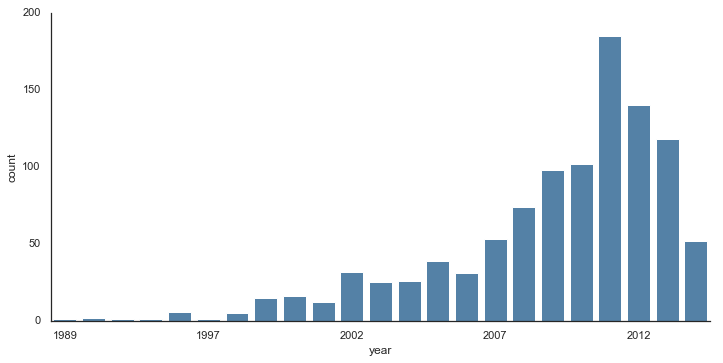

In [55]:
with sns.axes_style('white'):
    g = sns.catplot(data=planets, x="year", aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

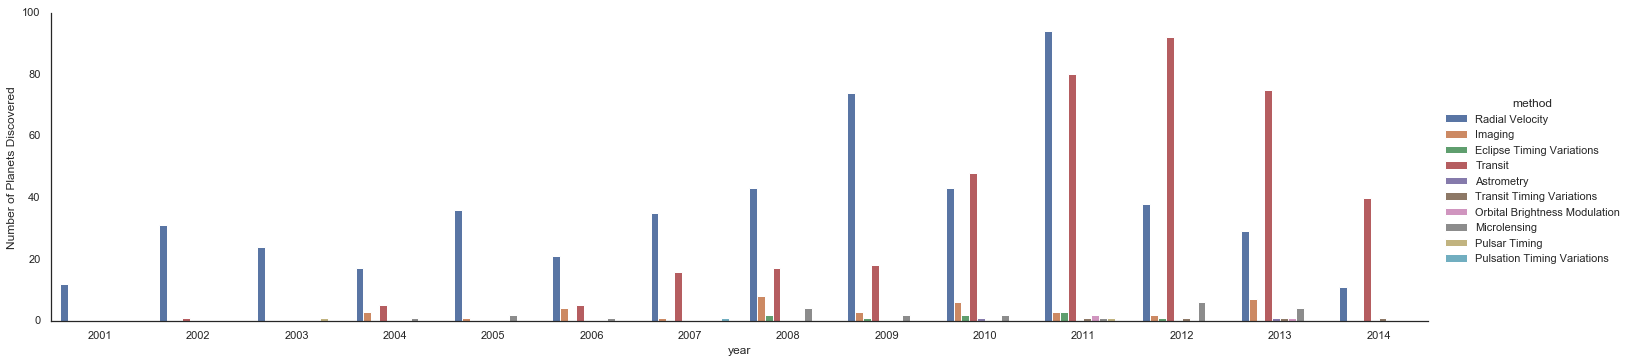

In [56]:
with sns.axes_style('white'):
    g = sns.catplot(data=planets, x="year", aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

## Example: Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.
I've scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded
(if you are interested in using Python for web scraping, I would recommend [*Web Scraping with Python*](http://shop.oreilly.com/product/0636920034391.do) by Ryan Mitchell).
We will start by downloading the data from
the Web, and loading it into Pandas:

In [37]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [59]:
data = pd.read_csv('./data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns as Python strings (type ``object``); we can see this by looking at the ``dtypes`` attribute of the DataFrame:

In [60]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Let's fix this by providing a converter for the times:

In [61]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('./data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [62]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

That looks much better. For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:

In [63]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


To get an idea of what the data looks like, we can plot a ``jointplot`` over the data:

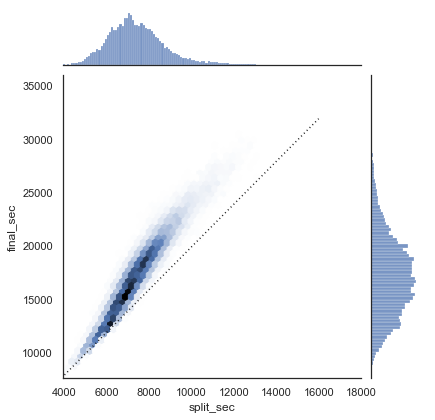

In [66]:
with sns.axes_style('white'):
    g = sns.jointplot(data=data, x='split_sec', y='final_sec', kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

In [68]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

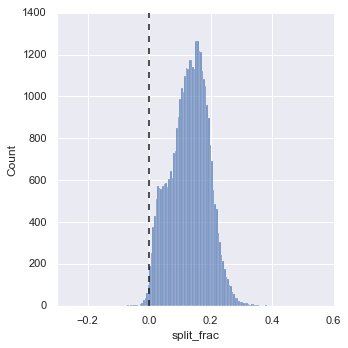

In [71]:
sns.displot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [72]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

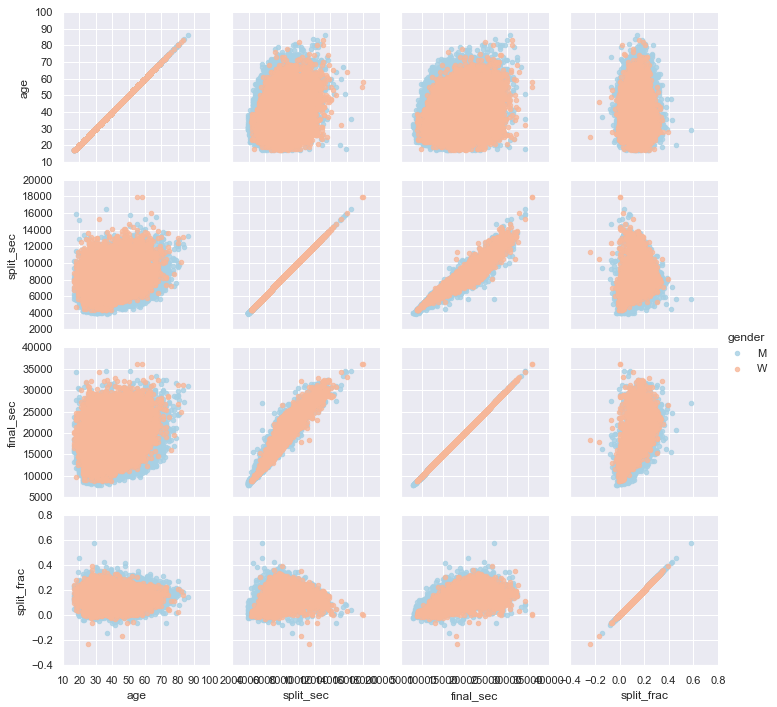

In [73]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.
(We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in [Customizing Ticks](04.10-Customizing-Ticks.ipynb) can be used to adjust such things if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:

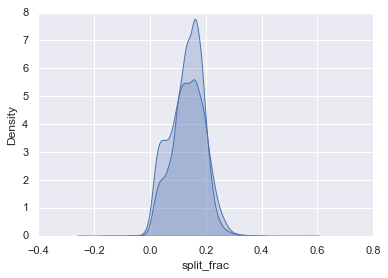

In [74]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a *violin plot*

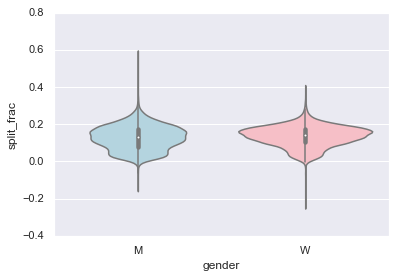

In [76]:
sns.violinplot(data=data, x="gender", y="split_frac", 
               palette=["lightblue", "lightpink"]);

This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [77]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


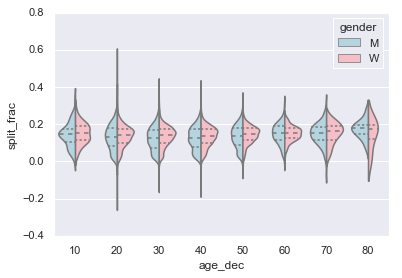

In [79]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(data=data, x="age_dec", y="split_frac", hue="gender",
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [80]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

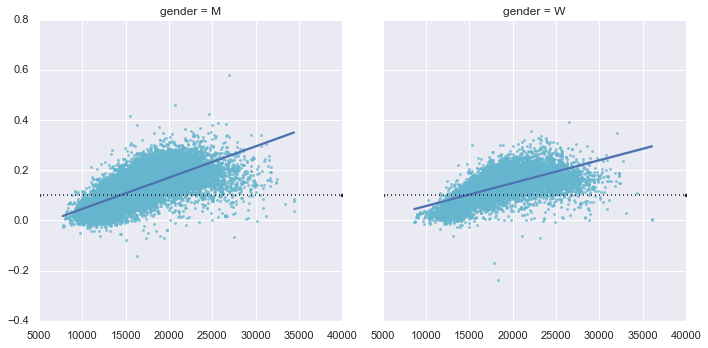

In [81]:
g = sns.lmplot(data=data, x='final_sec', y='split_frac', col='gender',
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

## Other Python Graphics Libraries

Although Matplotlib is the most prominent Python visualization library, there are other more modern tools that are worth exploring as well.
I'll mention a few of them briefly here:

- [Bokeh](http://bokeh.pydata.org) is a JavaScript visualization library with a Python frontend that creates highly interactive visualizations capable of handling very large and/or streaming datasets. The Python front-end outputs a JSON data structure that can be interpreted by the Bokeh JS engine.
- [Plotly](http://plot.ly) is the eponymous open source product of the Plotly company, and is similar in spirit to Bokeh. Because Plotly is the main product of a startup, it is receiving a high level of development effort. Use of the library is entirely free.
- [Vispy](http://vispy.org/) is an actively developed project focused on dynamic visualizations of very large datasets. Because it is built to target OpenGL and make use of efficient graphics processors in your computer, it is able to render some quite large and stunning visualizations.
- [Vega](https://vega.github.io/) and [Vega-Lite](https://vega.github.io/vega-lite) are declarative graphics representations, and are the product of years of research into the fundamental language of data visualization. The reference rendering implementation is JavaScript, but the API is language agnostic. There is a Python API under development in the [Altair](https://altair-viz.github.io/) package. Though as of summer 2016 it's not yet fully mature, I'm quite excited for the possibilities of this project to provide a common reference point for visualization in Python and other languages.

The visualization space in the Python community is very dynamic, and I fully expect this list to be out of date as soon as it is published.
Keep an eye out for what's coming in the future!

<!--NAVIGATION-->
< [Visualization with Seaborn](04.14-Visualization-With-Seaborn.ipynb) | [Contents](Index.ipynb) | [Machine Learning](05.00-Machine-Learning.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.15-Further-Resources.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
